In [47]:
using LinearAlgebra
using Gillespie
using Plots

In [56]:
# Model parameters.
δ = 0.
Ω = 1
Γ = 0.01

# Initial state.
ψ0 = complex(float([1 ; 0]))

# Simulation parameters.
t_final = 50.
dt = 0.01
number_trajectories = 1000

# Operators.
σx = complex(float([0 1 ; 1 0]))
σy = complex(float([0 -1im ; 1im 0]))
σz = complex(float([1 0 ; 0 -1]))
ide = complex(float([1 0 ; 0 1]))
σp = (σx + 1im * σy)/2
σ = σp'

# Hamiltonian.
H = δ * σ' * σ + Ω/2. * (σ' + σ)

# Jump operator.
M = sqrt(Γ) * σ

# The jump operators have to be passed as lists.
M_l = [M];

In [57]:
results = Gillespie.gillespie(H, M_l, ψ0, t_final, dt, number_trajectories, false)[1];

Gillespie evolution... 100%|█████████████████████████████| Time: 0:00:01


-> Truncation error given by norm of latest Qs matrix: 0.007798255182088386


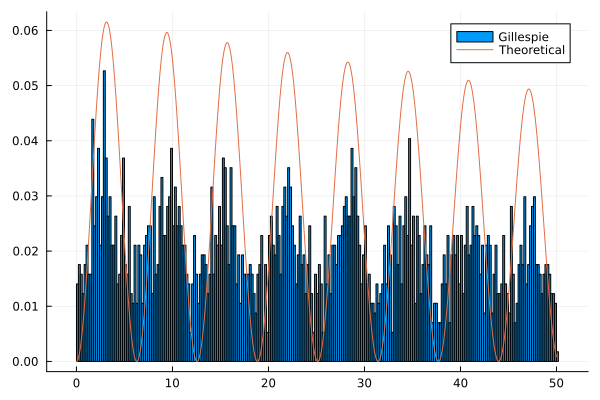

In [59]:
v_wtd = []
for trajectory in eachindex(results)
    for j in 2:length(results[trajectory])
        # The first jump has to be ignored, because it is fictitious and happens at time 0.
        diff = results[trajectory][j]["TimeSinceLast"]
        push!(v_wtd, diff)
    end
end

function theoretical_wtd(τ, Ω, Γ)
    λ = sqrt(Ω^2 - (Γ/2.)^2) / 2.
    return (Ω / 2. * λ)^2 * (sin(λ * τ))^2 * exp(- Γ * τ / 2.)
end

v_theo_wtd = []
t_range = 0:dt:t_final
for t in t_range
    wtd = theoretical_wtd(t, Ω, Γ)
    push!(v_theo_wtd, wtd)
end

histogram(v_wtd, bins=300, normalize=true, label="Gillespie")
display(plot!(t_range, v_theo_wtd, label="Theoretical"))